In [1]:
pip install numpy pandas matplotlib yfinance seaborn


  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/09/05/28664524fcc67c078313d482bf25fe403e9399130622cfc89e185ec0abf6/yfinance-0.2.54-py2.py3-none-any.whl.metadata
  Obtaining dependency information for multitasking>=0.0.7 from https://files.pythonhosted.org/packages/3e/8a/bb3160e76e844db9e69a413f055818969c8acade64e1a9ac5ce9dfdcf6c1/multitasking-0.0.11-py3-none-any.whl.metadata
  Obtaining dependency information for frozendict>=2.3.4 from https://files.pythonhosted.org/packages/04/13/d9839089b900fa7b479cce495d62110cddc4bd5630a04d8469916c0e79c5/frozendict-2.4.6-py311-none-any.whl.metadata
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     - -------------------------------------- 0.1/3.0 MB 3.6 MB/s eta 0:00:01
     ------ --------------------------------- 0.5/3.0 MB 5.9 MB/s eta 0:00:01
     ------------------- -------------------- 1.5/3.0 MB 10.5 MB/s eta 0:00:01
     ----------------------------------- ---- 2.7/3.0 MB 

In [25]:
pip install yfinance matplotlib pandas

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns
from datetime import datetime 



In [4]:
stock_symbol = "AAPL"
start_date = "2018-01-01"
end_date = datetime.today().strftime('%Y-%m-%d')

stock_data= yf.download(stock_symbol, start =start_date, end =end_date)

print(stock_data.head())

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2018-01-02  40.479847  40.489249  39.774869  39.986364  102223600
2018-01-03  40.472790  41.017975  40.409344  40.543288  118071600
2018-01-04  40.660786  40.764183  40.437543  40.545638   89738400
2018-01-05  41.123722  41.210668  40.665487  40.757134   94640000
2018-01-08  40.970978  41.267067  40.872278  40.970978   82271200


In [5]:
apple = yf.Ticker("AAPL")  
print(apple.info)  

{'address1': 'One Apple Park Way', 'city': 'Cupertino', 'state': 'CA', 'zip': '95014', 'country': 'United States', 'phone': '(408) 996-1010', 'website': 'https://www.apple.com', 'industry': 'Consumer Electronics', 'industryKey': 'consumer-electronics', 'industryDisp': 'Consumer Electronics', 'sector': 'Technology', 'sectorKey': 'technology', 'sectorDisp': 'Technology', 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, and HomePod. It also provides AppleCare support and cloud services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts, as w

In [6]:
history = apple.history(period="1mo")  # Fetch past 1 month's stock data
print(history[:10])
print(apple.dividends)  # Historical dividends
print(apple.splits)  # Stock split history


                                 Open        High         Low       Close  \
Date                                                                        
2025-02-18 00:00:00-05:00  244.149994  245.179993  241.839996  244.470001   
2025-02-19 00:00:00-05:00  244.660004  246.009995  243.160004  244.869995   
2025-02-20 00:00:00-05:00  244.940002  246.779999  244.289993  245.830002   
2025-02-21 00:00:00-05:00  245.949997  248.690002  245.220001  245.550003   
2025-02-24 00:00:00-05:00  244.929993  248.860001  244.419998  247.100006   
2025-02-25 00:00:00-05:00  248.000000  250.000000  244.910004  247.039993   
2025-02-26 00:00:00-05:00  244.330002  244.979996  239.130005  240.360001   
2025-02-27 00:00:00-05:00  239.410004  242.460007  237.059998  237.300003   
2025-02-28 00:00:00-05:00  236.949997  242.089996  230.199997  241.839996   
2025-03-03 00:00:00-05:00  241.789993  244.029999  236.110001  238.029999   

                             Volume  Dividends  Stock Splits  
Date        

Analyze Revenue & Profitability

Companies that consistently grow revenue and profit are better investments.

Total Revenue: $395,760,009,216
Net Income: $96,150,003,712


<Figure size 1000x500 with 0 Axes>

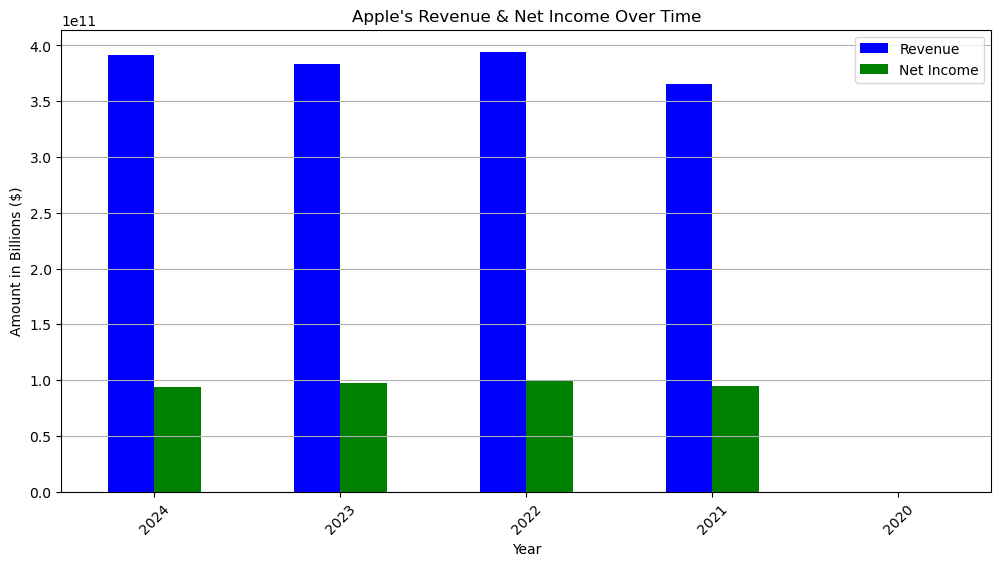

In [7]:
# Get revenue & net income
revenue = apple.info['totalRevenue'] #Total money the company makes
net_income = apple.info['netIncomeToCommon'] # Net Income: Profit after expenses

print(f"Total Revenue: ${revenue:,}") # Good Sign: If revenue and income grow every year, it's a strong company.
print(f"Net Income: ${net_income:,}")

#visualising the date to get better insight
# Get income statement (Revenue & Net Income)
income_statement = apple.financials  # This gives the latest financial data

# Extract Revenue & Net Income (Transpose for easier visualization)
df = income_statement.loc[['Total Revenue', 'Net Income']].T

# Convert index to year
df.index = df.index.year

# Plot revenue vs. net income
plt.figure(figsize=(10, 5))
df.plot(kind='bar', figsize=(12, 6), color=["blue", "green"])

# Chart labels
plt.title("Apple's Revenue & Net Income Over Time")
plt.xlabel("Year")
plt.ylabel("Amount in Billions ($)")
plt.xticks(rotation=45)
plt.legend(["Revenue", "Net Income"])
plt.grid(axis="y")

# Show plot
plt.show()


Price-to-Earnings (P/E) Ratio 📊

The P/E Ratio tells us if a stock is overvalued or undervalued - it measure how much investors are willing to pay for every dollar of a company's earning.
High P/E (above 30-40) = Expensive stock, might be overpriced.
Low P/E (below 15-20) = Cheap stock, might be undervalued.

P/E Ratio: 33.887302


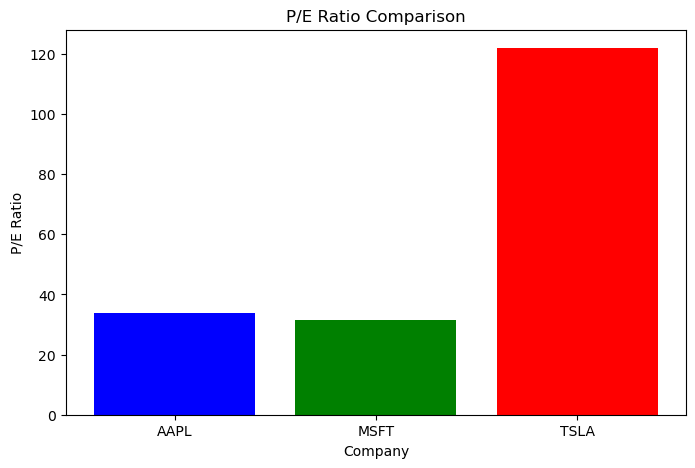

In [8]:
pe_ratio = apple.info['trailingPE']
print(f"P/E Ratio: {pe_ratio}")

# Fetch P/E ratios for multiple companies
companies = ["AAPL", "MSFT", "TSLA"]
pe_ratios = [yf.Ticker(ticker).info['trailingPE'] for ticker in companies]

# Create a bar chart
plt.figure(figsize=(8,5))
plt.bar(companies, pe_ratios, color=['blue', 'green', 'red'])
plt.xlabel("Company")
plt.ylabel("P/E Ratio")
plt.title("P/E Ratio Comparison")
plt.show()

Debt-to-Equity Ratio (D/E) 📉

How much debt a company has compared to its own money.

In [9]:
debt_equity_ratio = apple.info['debtToEquity']
print(f"Debt-to-Equity Ratio: {debt_equity_ratio}")


Debt-to-Equity Ratio: 145.0


Apple has $145 of debt for every $1 of equity.

normal D/E ratio for tech companies is between 0.5 -2.0 but apple ratio is 145 times more meaning has a lot of debt.
However, Apple is a trillion-dollar company with strong cash flow, so it can manage debt well.

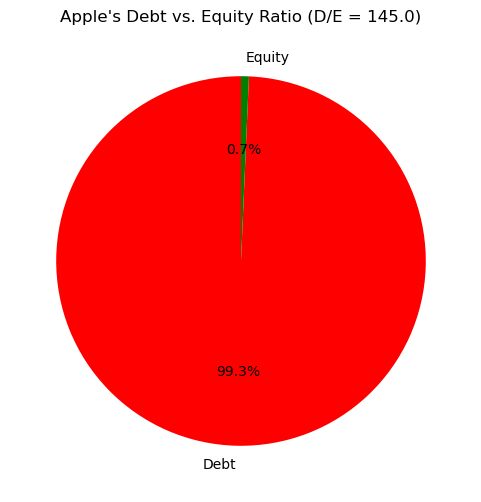

In [10]:
# Apple Debt-to-Equity Ratio
debt_ratio = 145  # Debt is 145 times equity
equity_ratio = 1  # Equity is the base value

# Labels and data
labels = ["Debt", "Equity"]
sizes = [debt_ratio, equity_ratio]
colors = ["red", "green"]

# Create a pie chart
plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title("Apple's Debt vs. Equity Ratio (D/E = 145.0)")
plt.show()


Dividend Yield 💰 (Passive Income)
Some companies pay shareholders dividends (extra cash rewards).

In [11]:
dividend_yield = apple.info['dividendYield']
print(f"Dividend Yield: {dividend_yield:.2%}")


Dividend Yield: 47.00%


Return on Equity (ROE) - How Efficiently a Company Makes Money
ROE measures how well a company turns investments into profits.

In [12]:
roe = apple.info['returnOnEquity']
print(f"Return on Equity (ROE): {roe:.2%}")


Return on Equity (ROE): 136.52%


In [13]:

# Define companies to compare
companies = ["AAPL", "MSFT", "TSLA"]
labels = ["Apple", "Microsoft", "Tesla"]

# Create empty lists to store metrics
pe_ratios = []
debt_equity_ratios = []
dividend_yields = []

# Fetch financial data for each company
for ticker in companies:
    stock = yf.Ticker(ticker)
    info = stock.info
    
    # Append financial metrics
    pe_ratios.append(info.get("trailingPE", 0))  # Default 0 if missing
    debt_equity_ratios.append(info.get("debtToEquity", 0))
    dividend_yields.append(info.get("dividendYield", 0) * 100)  # Convert to percentage

# Convert missing dividend yields to 0 for companies that don’t pay dividends
dividend_yields = [0 if np.isnan(d) else d for d in dividend_yields]

# Print the fetched data
print("P/E Ratios:", pe_ratios)
print("Debt-to-Equity Ratios:", debt_equity_ratios)
print("Dividend Yields:", dividend_yields)

P/E Ratios: [33.887302, 31.335485, 121.94147]
Debt-to-Equity Ratios: [145.0, 33.998, 18.489]
Dividend Yields: [47.0, 85.0, 0]


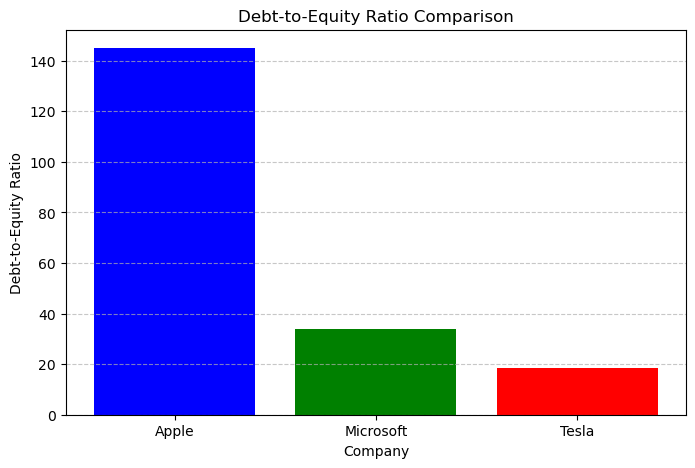

In [14]:
plt.figure(figsize=(8,5))
plt.bar(labels, debt_equity_ratios, color=['blue', 'green', 'red'])
plt.xlabel("Company")
plt.ylabel("Debt-to-Equity Ratio")
plt.title("Debt-to-Equity Ratio Comparison")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


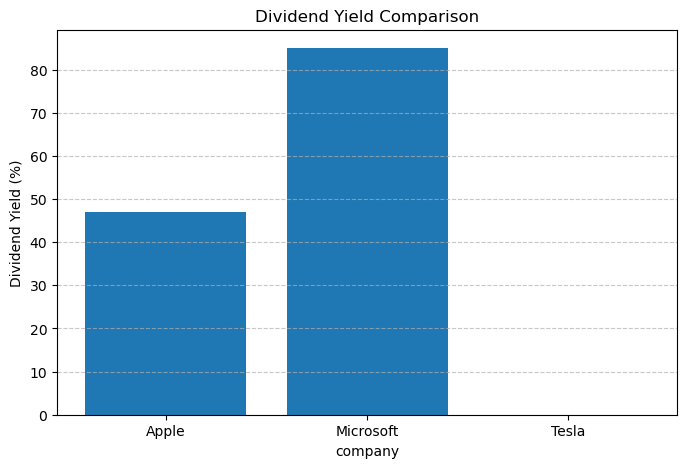

In [15]:
plt.figure(figsize=(8,5))
plt.bar(labels, dividend_yields)
plt.xlabel("company")
plt.ylabel("Dividend Yield (%)")
plt.title("Dividend Yield Comparison")
plt.grid(axis='y' , linestyle = '--' , alpha =0.7)
plt.show()

Tesla likely  0% because it doesn’t pay dividends.

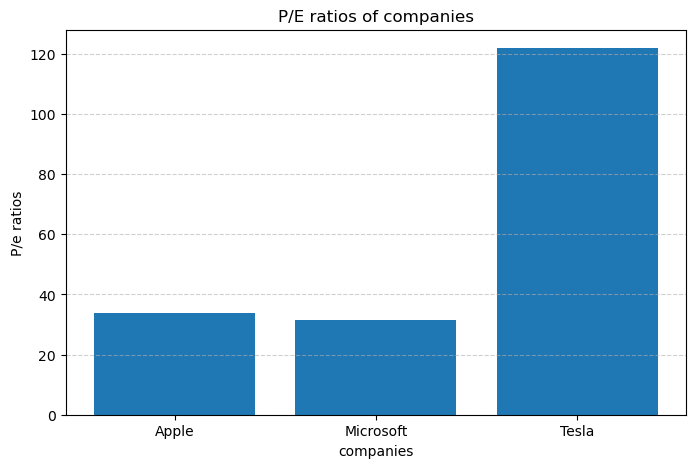

In [16]:
plt.figure(figsize= (8,5))
plt.bar(labels,pe_ratios)
plt.xlabel("companies")
plt.ylabel("P/e ratios")
plt.title("P/E ratios of companies")
plt.grid(axis='y',linestyle = '--', alpha = 0.6)
plt.show()

In [17]:
# Rename columns to avoid issues
stock_data.columns = [col[0] if isinstance(col, tuple) else col for col in stock_data.columns]

# Ensure we are using the correct column
if 'Adj Close' in stock_data.columns:
    price_column = 'Adj Close'
elif 'Close' in stock_data.columns:
    price_column = 'Close'
else:
    raise KeyError("Neither 'Adj Close' nor 'Close' found in stock_data!")

# Calculate daily returns
stock_data['Daily Returns'] = stock_data[price_column].pct_change()

# Display first few rows
print(stock_data[[price_column, 'Daily Returns']].head(10))


                Close  Daily Returns
Date                                
2018-01-02  40.479847            NaN
2018-01-03  40.472790      -0.000174
2018-01-04  40.660786       0.004645
2018-01-05  41.123722       0.011385
2018-01-08  40.970978      -0.003714
2018-01-09  40.966270      -0.000115
2018-01-10  40.956875      -0.000229
2018-01-11  41.189514       0.005680
2018-01-12  41.614857       0.010326
2018-01-16  41.403362      -0.005082


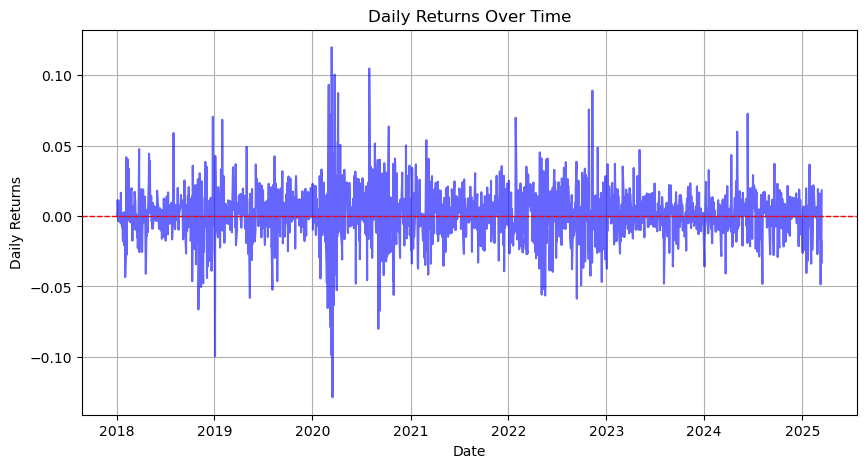

In [18]:

# Ensure the index is the date
plt.figure(figsize=(10, 5))
plt.plot(stock_data.index, stock_data['Daily Returns'], color='blue', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)  # Reference line at 0
plt.title("Daily Returns Over Time")
plt.xlabel("Date")  # Correct X-axis (time)
plt.ylabel("Daily Returns")
plt.grid(True)
plt.show()

In [23]:
import numpy as np
import matplotlib.pyplot as plt

def monte_carlo_simulation(stock_data, num_simulations=1000, time_horizon=252):
    # Use 'Adj Close' if available, otherwise 'Close'
    price_column = 'Adj Close' if 'Adj Close' in stock_data.columns else 'Close'
    
    # Get last stock price
    last_price = stock_data[price_column].iloc[-1]

    # Calculate daily returns mean & standard deviation (volatility)
    daily_returns = stock_data['Daily Returns'].dropna()
    mean_return = daily_returns.mean()
    volatility = daily_returns.std()

    # Initialize an array to store future price paths
    simulations = np.zeros((num_simulations, time_horizon))
    
    # Run the Monte Carlo simulation
    for i in range(num_simulations):
        # Create a series of random daily returns
        random_returns = np.random.normal(mean_return, volatility, time_horizon)
        
        # Generate the stock price path
        price_series = [last_price]
        for r in random_returns:
            price_series.append(price_series[-1] * (1 + r))  # Apply return

        simulations[i, :] = price_series[1:]

    return simulations


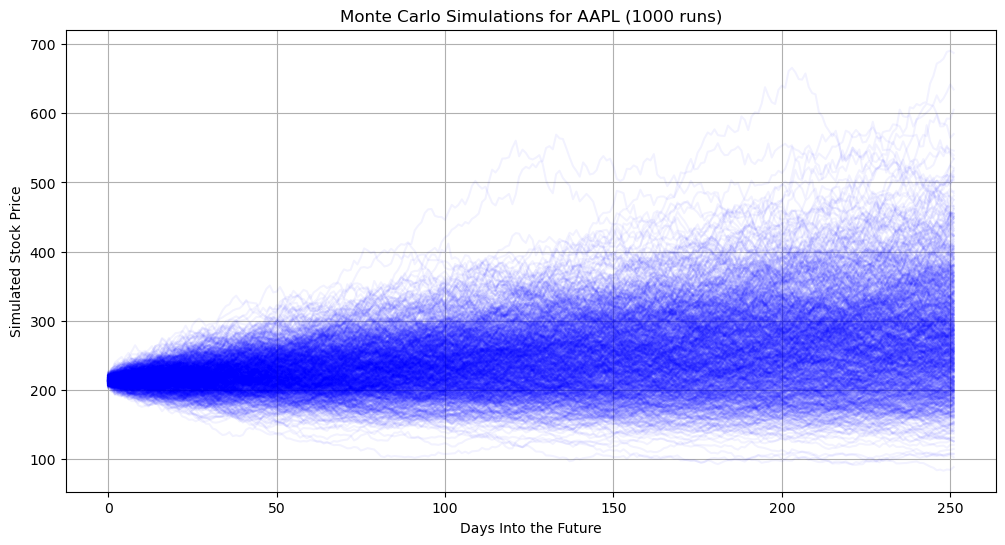

In [24]:
num_simulations = 1000
time_horizon = 252

# Run simulation
simulated_paths = monte_carlo_simulation(stock_data, num_simulations, time_horizon)

# Plot all simulations
plt.figure(figsize=(12, 6))
plt.plot(simulated_paths.T, color='blue', alpha=0.05)  # Plot all paths in transparent blue
plt.title(f"Monte Carlo Simulations for AAPL ({num_simulations} runs)")
plt.xlabel("Days Into the Future")
plt.ylabel("Simulated Stock Price")
plt.grid(True)

# Show the plot
plt.show()

Key Observations from the Graph
1️ Stock Prices Spread Over Time

At the beginning (Day 0), all paths start at the same price (~$200).
As time progresses, some paths move up 📈, some move down 📉, creating a fan-like shape.
This shows how uncertainty increases over time.

2️ Most Paths Stay in the Middle (Expected Price Range)

The densely packed region (where most blue lines are concentrated) shows the most probable future prices.
Most of the stock price paths seem to stay between $150 and $350 by the end of the year.

3️ Some Paths Go Extremely High or Low 

A few paths go above $/500 +, meaning there's a small chance of a big gain.
Some paths drop below $/100 , meaning there’s a small probability of a crash.
These outliers represent extreme market scenarios, but they are rare.

##### Expected Future Stock Price
You can calculate the average future stock price by taking the mean of the last day’s simulated prices.

In [25]:
expected_price = simulated_paths[:, -1].mean()
print(f"Expected Future Price: ${expected_price:.2f}")


Expected Future Price: $277.91


 Risk Analysis: 95% Confidence Interval
To understand the best-case and worst-case scenarios, calculate the 5th and 95th percentiles.

In [26]:
percentile_5 = np.percentile(simulated_paths[:, -1], 5)  # Worst-case (5% worst)
percentile_95 = np.percentile(simulated_paths[:, -1], 95)  # Best-case (5% best)

print(f"95% Confidence Interval: ${percentile_5:.2f} - ${percentile_95:.2f}")


95% Confidence Interval: $167.36 - $425.31


 Probability of a Stock Price Above or Below a Target
You can estimate the probability of the stock falling below or rising above a specific value.

In [27]:
prob_below_150 = np.mean(simulated_paths[:, -1] < 150) * 100
print(f"Probability of AAPL being below $150: {prob_below_150:.2f}%")


Probability of AAPL being below $150: 2.30%
